# 다층 퍼셉트론(MultiLayer Perceptron, MLP)로 텍스트 분류하기

## 1. 다층 퍼셉트론 (MLP)
- 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망
- FFNN의 가장 기본적인 형태
    - 입력층에서 출력층으로 한 방향으로만 연산 방향이 정해져 있는 신경망

## 2. 케라스의 texts_to_matrix()이해하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

# 위 텍스트에 대한 정수 인코딩 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


- texts_to_matrix(대상 데이터, mode='')
    - binary
    - count
        - 문서 단어 행렬(Document-Term Matrix, DTM)을 생성
        - 인덱스는 1부터 시작하는 반면, 행렬의 인덱스는 0 부터 시작한다. 따라서 실제 단어 개수는 9개지만, 완성된 행렬의 열의 개수는 10개, 첫번째 열은 모든 행의 값이 0 이다.
        - 인덱스 0 에는 아무 단어도 할당되지 않았기 때문
    - freq
    - tfidf

In [2]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [3]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))
# 단어의 존재 유무로만 행렬을 표현

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf'))
# TF-IDF 행렬을 만든다.
# TF : 각 문서에서의 각 단어의 빈도에 자연 로그 씌운 값
# IDF : 

[[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1.09861229 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.09861229 1.09861229 1.09861229]]


In [8]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))
# 둘쨰 자리에서 반올림
# 각 단어의 등장 횟수 / 모든 단어의 개수의 총 합

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## 3. 뉴스 그룹 데이터 이해하기
- 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지 예측하기

In [9]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# train 만 기재하면 훈련 데이터만 리턴해준다
# 'all' 을 넣으면 전체 데이터를 가져올 수 있다
newsdata = fetch_20newsgroups(subset='train') 

In [17]:
newsdata.keys()
# 이메일 본문 , 등 등 등

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [18]:
print("훈련용 샘플의 개수 : {}".format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [20]:
print(" 총 주제의 개수 : {} ".format(len(newsdata.target_names)))
print(newsdata.target_names)

 총 주제의 개수 : 20 
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [22]:
print("첫 번째 샘플의 레이블 : {}".format(newsdata.target[0]))
print("7번 레이블이 의미하는 주제 : {}".format(newsdata.target_names[7]))

첫 번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos


In [23]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







이메일의 내용을 보면 스포츠 카에 대한 글로 보인다. 훈련 데이터를 data와 target을 라벨링 하여 DataFrame으로 만들자

In [24]:
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [25]:
# Null Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [26]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


<AxesSubplot:>

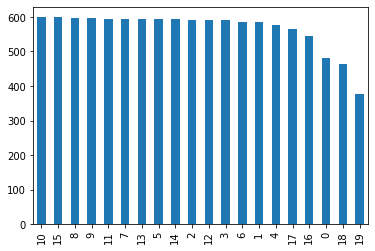

In [30]:
data['target'].value_counts().plot(kind='bar')

In [33]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [39]:
# 테스트 데이터 불러오기
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)

train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [40]:
# 케라스 토크나이저를 사용하여 빈도수 순으로 인덱스를 부여하므로
# 빈도수가 가장 높은 상위 vocab_szie 개수만큼 단어를 사용한다.

# 최대 단어의 크기
vocab_size = 10000
# target 이 20 개
num_classes = 20


In [41]:
# 전처리 함수
# 케라스 토크나이저로 단어 토큰화를 수행하고, texts_to_matrix 를 수행한다.
def prepare_data(train_data, test_data, mode): 
    tokenizer = Tokenizer(num_words= vocab_size) 
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, tokenizer.index_word

In [42]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [44]:
print("훈련 샘플 본문의 크기 : {} ".format(X_train.shape))
print("훈련 샘플 레이블의 크기 : {} ".format(y_train.shape))
print("테스트 샘플 본문의 크기 : {}".format(X_test.shape))
print("테스트 샘플 레이블의 크기 : {}".format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000) 
훈련 샘플 레이블의 크기 : (11314, 20) 
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [46]:
print("빈도수 상위 1번 단어 : {}".format(index_to_word[1]))
print("빈도수 상위 9999번 단어 : {} ".format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic 


## 4. 다층 퍼셉트론(MLP) 사용하여 텍스트 분류하기

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 다층 퍼셉트론 설계
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape = (vocab_size, ), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]
    

In [48]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-02-07 23:32:21.110925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-07 23:32:21.111043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-07 23:32:21.672021: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-07 23:32:21.820868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
80/80 [==============================] - 3s 13ms/step - loss: 2.2720 - accuracy: 0.3478 - val_loss: 0.9579 - val_accuracy: 0.8207
Epoch 2/5
 6/80 [=>............................] - ETA: 0s - loss: 1.1660 - accuracy: 0.7018

2022-02-07 23:32:24.826561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 11ms/step - loss: 0.7963 - accuracy: 0.7940 - val_loss: 0.4372 - val_accuracy: 0.8860
Epoch 3/5
80/80 [==============================] - 1s 11ms/step - loss: 0.3459 - accuracy: 0.9143 - val_loss: 0.3480 - val_accuracy: 0.8940
Epoch 4/5
80/80 [==============================] - 1s 11ms/step - loss: 0.1850 - accuracy: 0.9576 - val_loss: 0.3139 - val_accuracy: 0.9011
Epoch 5/5
80/80 [==============================] - 1s 11ms/step - loss: 0.1130 - accuracy: 0.9782 - val_loss: 0.2931 - val_accuracy: 0.9117
binary 모드의 테스트 정확도: 0.8216940760612488
Epoch 1/5
 6/80 [=>............................] - ETA: 0s - loss: 3.3464 - accuracy: 0.0716 

2022-02-07 23:32:32.984628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 12ms/step - loss: 2.7939 - accuracy: 0.2521 - val_loss: 1.7002 - val_accuracy: 0.7438
Epoch 2/5
 6/80 [=>............................] - ETA: 0s - loss: 1.8225 - accuracy: 0.5365

2022-02-07 23:32:33.962986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 11ms/step - loss: 1.3747 - accuracy: 0.6504 - val_loss: 0.6981 - val_accuracy: 0.8481
Epoch 3/5
80/80 [==============================] - 1s 11ms/step - loss: 0.7395 - accuracy: 0.8296 - val_loss: 0.4995 - val_accuracy: 0.8737
Epoch 4/5
80/80 [==============================] - 1s 11ms/step - loss: 0.4705 - accuracy: 0.8919 - val_loss: 0.4232 - val_accuracy: 0.8905
Epoch 5/5
80/80 [==============================] - 1s 11ms/step - loss: 0.2932 - accuracy: 0.9318 - val_loss: 0.4140 - val_accuracy: 0.8860
count 모드의 테스트 정확도: 0.8100106120109558
Epoch 1/5
 6/80 [=>............................] - ETA: 0s - loss: 3.2473 - accuracy: 0.0612 

2022-02-07 23:32:45.789353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 13ms/step - loss: 2.1487 - accuracy: 0.3819 - val_loss: 0.7292 - val_accuracy: 0.8560
Epoch 2/5
 6/80 [=>............................] - ETA: 0s - loss: 0.9078 - accuracy: 0.7630

2022-02-07 23:32:46.794390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 1s 11ms/step - loss: 0.7309 - accuracy: 0.8130 - val_loss: 0.3872 - val_accuracy: 0.8993
Epoch 3/5
 1/80 [..............................] - ETA: 0s - loss: 0.3660 - accuracy: 0.9062